In [1]:
import numpy as np
from scipy import stats
import keras
from keras import models
from keras.models import Sequential
from keras.layers import Dense, Dropout, SimpleRNN, LSTM, GRU
import h5py
from keras.callbacks import ModelCheckpoint

import random
import matplotlib.pyplot as plt

from utils import RandomSeedResetter
RandomSeedResetter.reset_random_seed(0)

Using TensorFlow backend.


In [2]:
input_train = np.load('data/lorenz/input_train.npy')
input_train_shuffle = np.load('data/lorenz/input_train_shuffle.npy')
input_train_mlp = np.load('data/lorenz/input_train_mlp.npy')
input_train_mlp_shuffle = np.load('data/lorenz/input_train_mlp_shuffle.npy')
output_train = np.load('data/lorenz/output_train.npy')
output_train_shuffle = np.load('data/lorenz/output_train_shuffle.npy')

input_valid = np.load('data/lorenz/input_valid.npy')
input_valid_mlp = np.load('data/lorenz/input_valid_mlp.npy')
output_valid = np.load('data/lorenz/output_valid.npy')

print('Train : ', input_train_shuffle.shape, output_train_shuffle.shape)
print('Valid : ', input_valid.shape, output_valid.shape)
print('Train of MLP: ', input_train_mlp_shuffle.shape, output_train_shuffle.shape)
print('Valid of MLP: ', input_valid_mlp.shape, output_valid.shape)

Train :  (50000, 225, 32) (50000, 32)
Valid :  (10000, 225, 32) (10000, 32)
Test :  (10000, 225, 32) (10000, 32)


In [3]:
len_input = len(input_train_shuffle[0, :])
dim_input = len(input_train_shuffle[0, 0, :])
dim_output = len(output_train_shuffle[0, :])

rnn_1 = SimpleRNN(
        # dim_output
        units=dim_input,
        # batch_size, length_input, dim_input
        batch_input_shape=(None, len_input, dim_input),
        # activation_function
        activation='tanh',
        return_sequences=True)
rnn_2 = SimpleRNN(
        # dim_output
        units=dim_input,
        # batch_size, length_input, dim_input
        batch_input_shape=(None, len_input, dim_input),
        # activation_function
        activation='tanh',
        return_sequences=True)
rnn_3 = SimpleRNN(
        # dim_output
        units=dim_output,
        # batch_size, length_input, dim_input
        batch_input_shape=(None, len_input, dim_input),
        # activation_function
        activation='tanh')

lstm_1 = LSTM(
        # dim_output
        units=dim_input,
        # batch_size, length_input, dim_input
        batch_input_shape=(None, len_input, dim_input),
        # activation_function
        activation='tanh',
        return_sequences=True)
lstm_2 = LSTM(
        # dim_output
        units=dim_input,
        # batch_size, length_input, dim_input
        batch_input_shape=(None, len_input, dim_input),
        # activation_function
        activation='tanh',
        return_sequences=True)
lstm_3 = LSTM(
        # dim_output
        units=dim_output,
        # batch_size, length_input, dim_input
        batch_input_shape=(None, len_input, dim_input),
        # activation_function
        activation='tanh')

gru_1 = GRU(
        # dim_output
        units=dim_input,
        # batch_size, length_input, dim_input
        batch_input_shape=(None, len_input, dim_input),
        # activation_function
        activation='tanh',
        return_sequences=True)
gru_2 = GRU(
        # dim_output
        units=dim_input,
        # batch_size, length_input, dim_input
        batch_input_shape=(None, len_input, dim_input),
        # activation_function
        activation='tanh',
        return_sequences=True)
gru_3 = GRU(
        # dim_output
        units=dim_output,
        # batch_size, length_input, dim_input
        batch_input_shape=(None, len_input, dim_input),
        # activation_function
        activation='tanh')

In [4]:
model_mlp = Sequential()
model_mlp.add(Dense(len_input+dim_input-1, activation='relu', input_shape=(len_input+dim_output-1,)))
model_mlp.add(Dropout(0.5))
model_mlp.add(Dense(len_input+dim_input-1, activation='relu', input_shape=(len_input+dim_output-1,)))
model_mlp.add(Dropout(0.5))
model_mlp.add(Dense(len_input+dim_input-1, activation='relu', input_shape=(len_input+dim_output-1,)))
model_mlp.add(Dropout(0.5))
model_mlp.add(Dense(dim_output, activation='linear'))

model_rnn = Sequential()
model_rnn.add(rnn_1)
model_rnn.add(rnn_2)
model_rnn.add(rnn_3)

model_lstm = Sequential()
model_lstm.add(lstm_1)
model_lstm.add(lstm_2)
model_lstm.add(lstm_3)

model_gru = Sequential()
model_gru.add(gru_1)
model_gru.add(gru_2)
model_gru.add(gru_3)

model_mlp.compile(optimizer='adam',
    loss='mean_squared_error')
model_rnn.compile(optimizer='adam',
    loss='mean_squared_error')
model_lstm.compile(optimizer='adam',
    loss='mean_squared_error')
model_gru.compile(optimizer='adam',
    loss='mean_squared_error')

model_check_mlp = ModelCheckpoint(filepath = 'model/mlp_lorenz/model_check_mlp.h5',
                                  monitor='val_loss',
                                  verbose=0,
                                  save_best_only=True,
                                  save_weights_only=False,
                                  mode='min',
                                  period=1)
model_check_rnn = ModelCheckpoint(filepath = 'model/mlp_lorenz/model_check_rnn.h5',
                                  monitor='val_loss',
                                  verbose=0,
                                  save_best_only=True,
                                  save_weights_only=False,
                                  mode='min',
                                  period=1)
model_check_lstm = ModelCheckpoint(filepath = 'model/mlp_lorenz/model_check_lstm.h5',
                                  monitor='val_loss',
                                  verbose=0,
                                  save_best_only=True,
                                  save_weights_only=False,
                                  mode='min',
                                  period=1)
model_check_gru = ModelCheckpoint(filepath = 'model/mlp_lorenz/model_check_gru.h5',
                                  monitor='val_loss',
                                  verbose=0,
                                  save_best_only=True,
                                  save_weights_only=False,
                                  mode='min',
                                  period=1)

size_epoch = 100
size_batch = 500

In [5]:
history_mlp = model_mlp.fit(
    input_train_mlp_shuffle[:, :],
    output_train_shuffle[:, :],
    validation_data=(input_valid_mlp[:, :], output_valid[:, :]),
    epochs=size_epoch,
    batch_size=size_batch,
    shuffle=True,
    verbose=2,
    callbacks=[model_check_mlp])

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
 - 2s - loss: 0.1996 - val_loss: 0.1846
Epoch 2/100
 - 1s - loss: 0.1847 - val_loss: 0.1839
Epoch 3/100
 - 1s - loss: 0.1827 - val_loss: 0.1800
Epoch 4/100
 - 1s - loss: 0.1799 - val_loss: 0.1765
Epoch 5/100
 - 1s - loss: 0.1772 - val_loss: 0.1733
Epoch 6/100
 - 1s - loss: 0.1749 - val_loss: 0.1708
Epoch 7/100
 - 1s - loss: 0.1729 - val_loss: 0.1680
Epoch 8/100
 - 1s - loss: 0.1707 - val_loss: 0.1659
Epoch 9/100
 - 1s - loss: 0.1688 - val_loss: 0.1631
Epoch 10/100
 - 1s - loss: 0.1662 - val_loss: 0.1589
Epoch 11/100
 - 2s - loss: 0.1629 - val_loss: 0.1555
Epoch 12/100
 - 1s - loss: 0.1599 - val_loss: 0.1520
Epoch 13/100
 - 1s - loss: 0.1566 - val_loss: 0.1486
Epoch 14/100
 - 1s - loss: 0.1539 - val_loss: 0.1461
Epoch 15/100
 - 1s - loss: 0.1511 - val_loss: 0.1429
Epoch 16/100
 - 1s - loss: 0.1486 - val_loss: 0.1403
Epoch 17/100
 - 1s - loss: 0.1465 - val_loss: 0.1384
Epoch 18/100
 - 1s - loss: 0.1445 - val_loss: 0.1368
Epoch

In [6]:
history_rnn = model_rnn.fit(
    input_train_shuffle[:, :, :],
    output_train_shuffle[:, :],
    validation_data=(input_valid[:, :, :], output_valid[:, :]),
    epochs=size_epoch,
    batch_size=size_batch,
    shuffle=True,
    verbose=2,
    callbacks=[model_check_rnn])

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
 - 43s - loss: 0.2446 - val_loss: 0.1902
Epoch 2/100
 - 39s - loss: 0.1813 - val_loss: 0.1739
Epoch 3/100
 - 38s - loss: 0.1665 - val_loss: 0.1574
Epoch 4/100
 - 38s - loss: 0.1528 - val_loss: 0.1501
Epoch 5/100
 - 36s - loss: 0.1476 - val_loss: 0.1460
Epoch 6/100
 - 37s - loss: 0.1441 - val_loss: 0.1449
Epoch 7/100
 - 37s - loss: 0.1418 - val_loss: 0.1416
Epoch 8/100
 - 38s - loss: 0.1396 - val_loss: 0.1395
Epoch 9/100
 - 39s - loss: 0.1382 - val_loss: 0.1370
Epoch 10/100
 - 38s - loss: 0.1362 - val_loss: 0.1357
Epoch 11/100
 - 38s - loss: 0.1355 - val_loss: 0.1346
Epoch 12/100
 - 38s - loss: 0.1336 - val_loss: 0.1328
Epoch 13/100
 - 38s - loss: 0.1326 - val_loss: 0.1315
Epoch 14/100
 - 41s - loss: 0.1316 - val_loss: 0.1321
Epoch 15/100
 - 37s - loss: 0.1302 - val_loss: 0.1299
Epoch 16/100
 - 37s - loss: 0.1291 - val_loss: 0.1298
Epoch 17/100
 - 38s - loss: 0.1286 - val_loss: 0.1277
Epoch 18/100
 - 39s - loss: 0.1273 - val_

In [7]:
history_lstm = model_lstm.fit(
    input_train_shuffle[:, :, :],
    output_train_shuffle[:, :],
    validation_data=(input_valid[:, :, :], output_valid[:, :]),
    epochs=size_epoch,
    batch_size=size_batch,
    shuffle=True,
    verbose=2,
    callbacks=[model_check_lstm])

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
 - 149s - loss: 0.1835 - val_loss: 0.1826
Epoch 2/100
 - 150s - loss: 0.1773 - val_loss: 0.1709
Epoch 3/100
 - 147s - loss: 0.1625 - val_loss: 0.1574
Epoch 4/100
 - 149s - loss: 0.1512 - val_loss: 0.1476
Epoch 5/100
 - 144s - loss: 0.1439 - val_loss: 0.1418
Epoch 6/100
 - 149s - loss: 0.1381 - val_loss: 0.1357
Epoch 7/100
 - 148s - loss: 0.1327 - val_loss: 0.1295
Epoch 8/100
 - 147s - loss: 0.1279 - val_loss: 0.1266
Epoch 9/100
 - 151s - loss: 0.1241 - val_loss: 0.1225
Epoch 10/100
 - 143s - loss: 0.1198 - val_loss: 0.1199
Epoch 11/100
 - 145s - loss: 0.1160 - val_loss: 0.1146
Epoch 12/100
 - 149s - loss: 0.1131 - val_loss: 0.1124
Epoch 13/100
 - 141s - loss: 0.1113 - val_loss: 0.1072
Epoch 14/100
 - 144s - loss: 0.1078 - val_loss: 0.1078
Epoch 15/100
 - 154s - loss: 0.1073 - val_loss: 0.1043
Epoch 16/100
 - 147s - loss: 0.1041 - val_loss: 0.1008
Epoch 17/100
 - 143s - loss: 0.1013 - val_loss: 0.1043
Epoch 18/100
 - 145s - l

In [8]:
history_gru = model_gru.fit(
    input_train_shuffle[:, :, :],
    output_train_shuffle[:, :],
    validation_data=(input_valid[:, :, :], output_valid[:, :]),
    epochs=size_epoch,
    batch_size=size_batch,
    shuffle=True,
    verbose=2,
    callbacks=[model_check_gru])

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
 - 111s - loss: 0.1820 - val_loss: 0.1797
Epoch 2/100
 - 110s - loss: 0.1763 - val_loss: 0.1699
Epoch 3/100
 - 110s - loss: 0.1552 - val_loss: 0.1490
Epoch 4/100
 - 110s - loss: 0.1457 - val_loss: 0.1436
Epoch 5/100
 - 110s - loss: 0.1398 - val_loss: 0.1373
Epoch 6/100
 - 110s - loss: 0.1338 - val_loss: 0.1306
Epoch 7/100
 - 121s - loss: 0.1282 - val_loss: 0.1246
Epoch 8/100
 - 118s - loss: 0.1223 - val_loss: 0.1203
Epoch 9/100
 - 119s - loss: 0.1179 - val_loss: 0.1183
Epoch 10/100
 - 110s - loss: 0.1150 - val_loss: 0.1156
Epoch 11/100
 - 110s - loss: 0.1123 - val_loss: 0.1180
Epoch 12/100
 - 110s - loss: 0.1106 - val_loss: 0.1096
Epoch 13/100
 - 110s - loss: 0.1082 - val_loss: 0.1074
Epoch 14/100
 - 109s - loss: 0.1057 - val_loss: 0.1056
Epoch 15/100
 - 110s - loss: 0.1042 - val_loss: 0.1011
Epoch 16/100
 - 110s - loss: 0.1012 - val_loss: 0.1013
Epoch 17/100
 - 110s - loss: 0.0994 - val_loss: 0.0973
Epoch 18/100
 - 110s - l

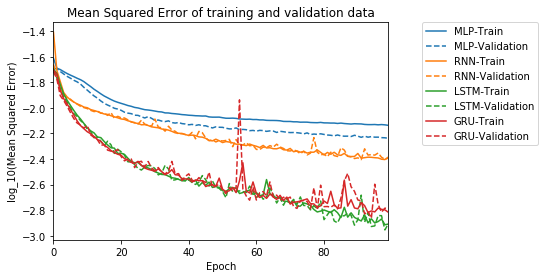

In [108]:
# Plot training & validation loss values
plt.figure()
plt.title('Mean Squared Error of training and validation data')

plt.ylabel('log_10(Mean Squared Error)')
plt.xlabel('Epoch')

plt.plot(np.log(history_mlp.history['loss']), label='MLP-Train', color = 'tab:blue')
plt.plot(np.log(history_mlp.history['val_loss']), label='MLP-Validation', color = 'tab:blue', linestyle='dashed')
plt.plot(np.log(history_rnn.history['loss']), label='RNN-Train', color = 'tab:orange')
plt.plot(np.log(history_rnn.history['val_loss']), label='RNN-Validation', color = 'tab:orange', linestyle='dashed')
plt.plot(np.log(history_lstm.history['loss']), label='LSTM-Train', color = 'tab:green')
plt.plot(np.log(history_lstm.history['val_loss']), label='LSTM-Validation', color = 'tab:green', linestyle='dashed')
plt.plot(np.log(history_gru.history['loss']), label='GRU-Train', color = 'tab:red')
plt.plot(np.log(history_gru.history['val_loss']), label='GRU-Validation', color = 'tab:red', linestyle='dashed')

plt.legend(bbox_to_anchor=(1.1, 1), loc='upper left', borderaxespad=0)
plt.xlim(0, size_epoch-1)
plt.show()

In [ ]:
import json

with open('model/mlp_lorenz/history_mlp.json', 'w') as f:
    json.dump(history_mlp.history, f)
with open('model/mlp_lorenz/history_rnn.json', 'w') as f:
    json.dump(history_rnn.history, f)
with open('model/mlp_lorenz/history_lstm.json', 'w') as f:
    json.dump(history_lstm.history, f)
with open('model/mlp_lorenz/history_gru.json', 'w') as f:
    json.dump(history_gru.history, f)